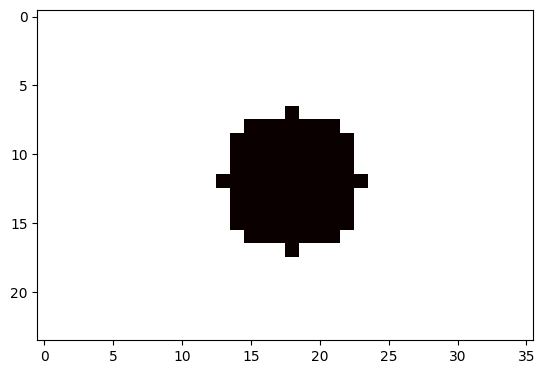

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation
import random

# np.seterr(divide=None, invalid=None)  # For suppressing warnings. Totally optional.

yResolution = 32
xResolution = 32
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
walls.borderWall()
#walls.cylindricalWall([12, 18], 5)
velocityInlet = [] # [VelocityBoundary(12, 2, 1, 1)]
pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

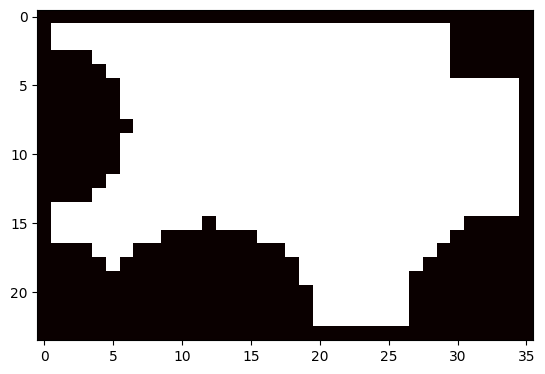

In [102]:
yResolution = 24
xResolution = 36
initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
walls = WallBoundary(yResolution, xResolution)
# walls.borderWall()

for i in random.sample(range(8), k = random.randint(1,8)):
    
    possiblePositions = [(int(yResolution/3), xResolution - 1), (0, int(xResolution/3)), (int(yResolution/3), 0), (yResolution - 1, int(xResolution/3)), (0, xResolution - 1), (0, 0), (yResolution - 1, 0), (yResolution - 1, xResolution - 1)]

    wallPos = possiblePositions[i]
    maxSize = int(min(yResolution, xResolution) * 0.3)
    minSize = int(min(yResolution, xResolution) * 0.2)
    if random.random() < 0.5:
        walls.cylindricalWall(wallPos, random.randint(minSize, maxSize))
    else:
        directions = [(1,-1),(1,1),(1,1),(-1,1),(1,-1),(1,1),(-1,1),(-1,-1)]
        endPos = (wallPos[0] + (random.randint(minSize, maxSize)*directions[i][0]), wallPos[1] + (random.randint(minSize, maxSize)*directions[i][1]))
        walls.filledStraightRectangularWall(wallPos, endPos)
    #print(f"{i} {wallPos} {endPos} {directions[i]}")

walls.borderWall()

velocityInlet = [VelocityBoundary(12, 2, 1, 1)]
#pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

simulation = Simulation(
    yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
)

plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

{'SizeX': [32], 'SizeY': [48], 'NumberOfCuts': [6], 'TypesOfCuts': [[1, 1, 0, 1, 0, 1]], 'CutPositionsX': [[0, 31, 10, 0, 0, 31]], 'CutPositionsY': [[47, 16, 47, 0, 16, 47]], 'CutSizesX': [[6, 7, 10, 10, 11, 11]], 'CutSizesY': [[6, 12, 10, 8, 11, 12]]}
[(2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (8, 11), (9, 10), (10, 10), (11, 10), (12, 11), (13, 11), (14, 11), (15, 11), (16, 12), (17, 11), (18, 11), (19, 11), (20, 11), (21, 10), (22, 10), (23, 9), (24, 8), (25, 7), (26, 6), (26, 5), (27, 4), (27, 3), (27, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (40, 2), (39, 3), (38, 4), (38, 5), (37, 6), (37, 7), (37, 8), (37, 9), (36, 10), (37, 11), (37, 12), (37, 13), (37, 14), (38, 15), (38, 16), (39, 17), (40, 18), (40, 19), (41, 19), (42, 19), (42, 19)]


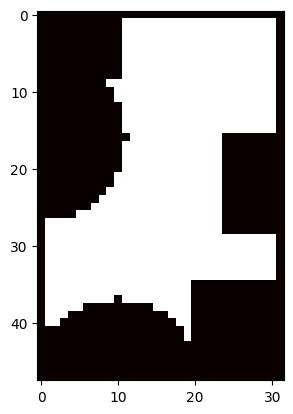

In [103]:
for i in range(1):
    yResolution = 48
    xResolution = 32
    initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
    walls = WallBoundary(yResolution, xResolution)
    # walls.borderWall()
    walls.borderWall()
    conditions = walls.generateRoom()
    walls.generateIndex()
    walls.generateACDirections()
    walls.indexWithoutCare()
    #print(conditions)
    #print(walls.possibleACIndex)
    #velocityInlet = [VelocityBoundary(12, 2, 1, 1)]
    #pressureInlet = [PressureBoundary(12, 2, 1, 0, 1)]

    simulation = Simulation(
        yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=pressureInlet
    )

    plt.imshow(simulation.density, cmap="hot", interpolation="nearest")

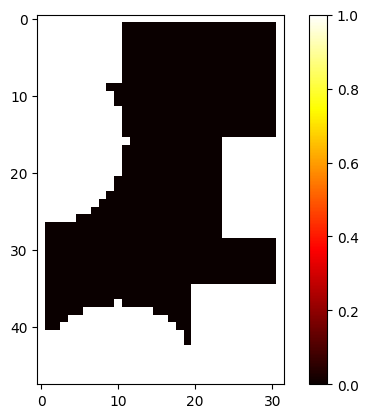

In [104]:
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.boundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)

In [105]:
# walls.generateIndex()
# walls.generateACDirections()
# walls.indexPossibleACPos()

[(2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (8, 11), (9, 10), (10, 10), (11, 10), (12, 11), (13, 11), (14, 11), (15, 11), (16, 12), (17, 11), (18, 11), (19, 11), (20, 11), (21, 10), (22, 10), (23, 9), (24, 8), (25, 7), (26, 6), (26, 5), (27, 4), (27, 3), (27, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (40, 2), (39, 3), (38, 4), (38, 5), (37, 6), (37, 7), (37, 8), (37, 9), (36, 10), (37, 11), (37, 12), (37, 13), (37, 14), (38, 15), (38, 16), (39, 17), (40, 18), (40, 19), (41, 19), (42, 19), (42, 19), (2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (8, 11), (9, 10), (10, 10), (11, 10), (12, 11), (13, 11), (14, 11), (15, 11), (16, 12), (17, 11), (18, 11), (19, 11), (20, 11), (21, 10), (22, 10), (23, 9), (24, 8), (25, 7), (26, 6), (26, 5), (27, 4), (27, 3), (27, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1

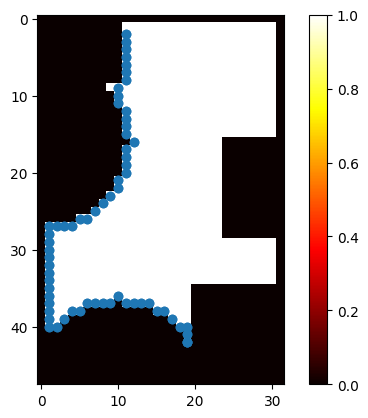

In [106]:
#walls.possibleACPos
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.imshow(walls.possibleACPos)

# outPutDirectionsY = np.array([WallBoundary.unitVect[j][0] for i in walls.possibleACDirections for j in i])
# outPutDirectionsX = np.array([WallBoundary.unitVect[j][1] for i in walls.possibleACDirections for j in i])
# outPutPositionsX = [i[0] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
# print(len(outPutPositionsX))
# outPutPositionsY = [i[1] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
# quivermap = ax.quiver(outPutPositionsY, outPutPositionsX, 310*outPutDirectionsX, -310*outPutDirectionsY)

[(0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (1, 10), (1, 31), (2, 10), (2, 31), (3, 10), (3, 31), (4, 10), (4, 31), (5, 10), (5, 31), (6, 10), (6, 31), (7, 10), (7, 31), (8, 9), (8, 10), (8, 31), (9, 31), (10, 9), (10, 31), (11, 9), (11, 31), (12, 10), (12, 31), (13, 10), (13, 31), (14, 10), (14, 31), (15, 10), (15, 31), (16, 10), (16, 11), (16, 24), (16, 25), (16, 26), (16, 27), (16, 28), (16, 29), (16, 30), (17, 10), (17, 24), (18, 10), (18, 24), (19, 10), (19, 24), (20, 10), (20, 24), (21, 9), (21, 24), (22, 9), (22, 24), (23, 8), (23, 24), (24, 7), (24, 24), (25, 5), (25, 6), (25, 24), (26, 1), (26, 2), (26, 3), (26, 4), (26, 24), (27, 0), (27, 24), (28, 0), (28, 24), (28, 25), (28, 26), (28, 27), (28, 28), (28, 29), (28, 30), (29, 0), (29, 31), (30, 0), (30, 31), (31, 0), (31, 31), (32, 0), (32, 31), (33, 0), (33, 31), (34, 0), (34, 31), (35, 0),

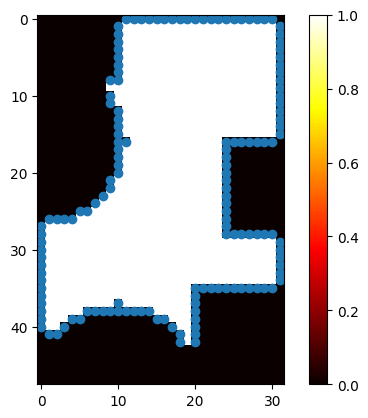

In [107]:
#walls.possibleACPos
fig, ax = plt.subplots()
heatmap  = ax.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
fig.colorbar(heatmap)
ax.scatter([i[1] for i in walls.possibleACIndex], [i[0] for i in walls.possibleACIndex])
real = np.sum(walls.possibleACPos)
bad = len(walls.possibleACIndex)
print(real)
print(bad)
print(bad/real < 0.8)

# outPutDirectionsY = np.array([WallBoundary.unitVect[j][0] for i in walls.possibleACDirections for j in i])
# outPutDirectionsX = np.array([WallBoundary.unitVect[j][1] for i in walls.possibleACDirections for j in i])
# outPutPositionsX = [i[0] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
# print(len(outPutPositionsX))
# outPutPositionsY = [i[1] for index, i in enumerate(walls.possibleACPos) for j in range(len(walls.possibleACDirections[index]))]
# quivermap = ax.quiver(outPutPositionsY, outPutPositionsX, 310*outPutDirectionsX, -310*outPutDirectionsY)

In [108]:
# from scipy.ndimage import convolve

# def numerical_inverse(n):
#     return int(n != 1)

# data = np.array([[1,1,1,1],[1,0,0,1],[1,0,0,1],[1,1,1,1]])

# applyall = np.vectorize(numerical_inverse)
# inverted = applyall(data)
# print(inverted)

# padded_array = np.pad(inverted, pad_width=1, mode='constant', constant_values=0)
# kernel = [[1,1,1],[1,0,1],[1,1,1]]



# print(convolve(padded_array, kernel)[1:-1, 1:-1])

[[0 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [0 0 0 0]]
[[1 2 2 1]
 [2 3 3 2]
 [2 3 3 2]
 [1 2 2 1]]


In [109]:
n = [1,2,3,4]
m = [1,2,3,4]

In [110]:
# simulation.simulate(step = 10)
# print(simulation.isAtDensityEquilibirum(1.9))

# densityPlot = copy.copy(simulation.density)
# densityPlot[walls.invertedBoundary] -= np.min(densityPlot[walls.invertedBoundary])

# fig, ax = plt.subplots()
# heatmap = ax.imshow(densityPlot, cmap = "rainbow", interpolation = "nearest")
# quivermap = ax.quiver(simulation.xIndex, simulation.yIndex, simulation.momentumX, -simulation.momentumY)
# fig.colorbar(heatmap)
# # print(simulation.fluid)
# plt.show()